In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
df_train=pd.read_csv('../hp/Downloads/stock_price_predict/Google_Stock_Price_Train.csv',index_col='Date',parse_dates=True)
df_test=pd.read_csv('../hp/Downloads/stock_price_predict/Google_Stock_Price_Test.csv')

In [3]:
df_train.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
df_train.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<AxesSubplot:xlabel='Date'>

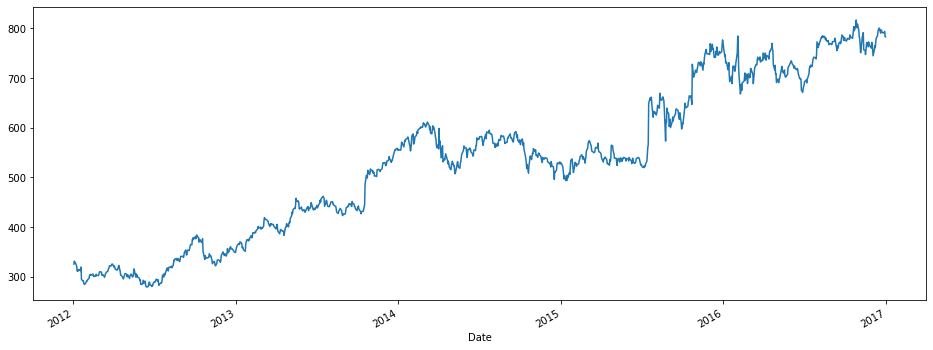

In [7]:
df_train['Open'].plot(figsize=(16,6))

In [8]:
#convert column of a dataframe
df_train['Close'] = df_train['Close'].str.replace(',','').astype(float)

In [9]:
df_train['Volume'] = df_train['Volume'].str.replace(',','').astype(float)

In [10]:
#7 day rolling mean
df_train.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<AxesSubplot:xlabel='Date'>

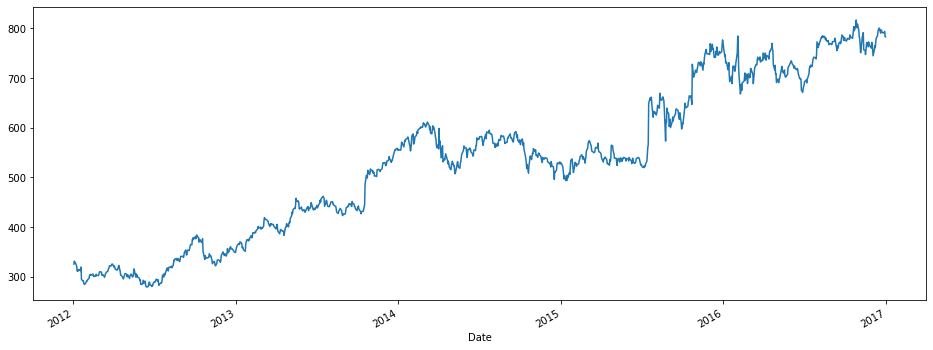

In [11]:
df_train['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

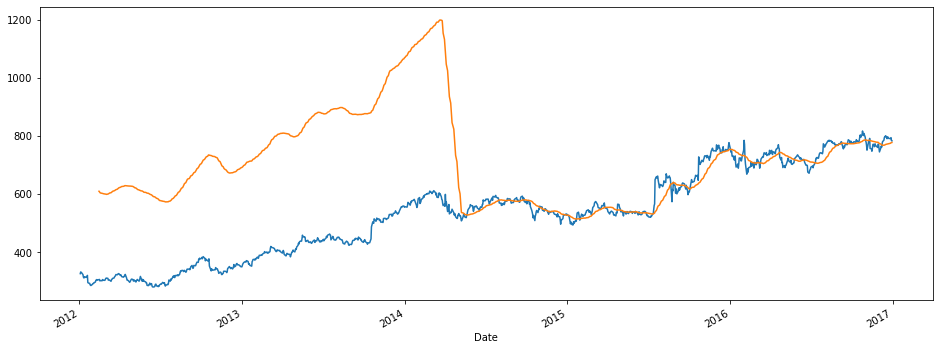

In [12]:
df_train['Open'].plot(figsize=(16,6))
df_train.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

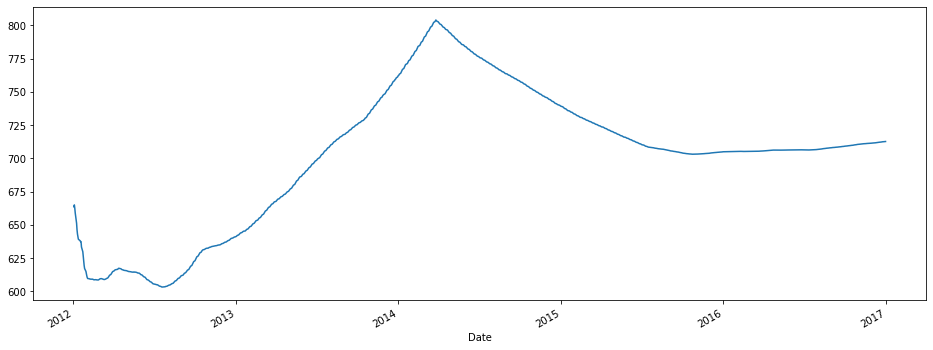

In [13]:
df_train['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [14]:
training_set=df_train['Open']
training_set=pd.DataFrame(training_set)

In [15]:
#data cleaning
df_train.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [16]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range = (0,1 ))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
#creating a data structure with 60 timesteps and 1 output
X_train =[]
y_train = []
for i in range(60,1250):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train ,y_train =np.array(X_train),np.array(y_train)

#Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [18]:
#Building the RNN
#import the keras lib 
from tensorflow. keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [19]:
#Initialising the RNN
model = Sequential()


In [20]:
#Adding the LSTM layer
model.add(LSTM(100,return_sequences=True,input_shape = (60,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(1))

In [21]:
#Compling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
#Fitting the RNN to the traning set
h=model.fit(X_train,y_train,epochs = 30,batch_size = 32)

Epoch 1/30
38/38 [==============================] - 24s 622ms/step - loss: 0.0286
Epoch 2/30
38/38 [==============================] - 24s 622ms/step - loss: 0.0023
Epoch 3/30
38/38 [==============================] - 23s 614ms/step - loss: 0.0020
Epoch 4/30
38/38 [==============================] - 24s 629ms/step - loss: 0.0024
Epoch 5/30
38/38 [==============================] - 23s 613ms/step - loss: 0.0023
Epoch 6/30
38/38 [==============================] - 23s 614ms/step - loss: 0.0020
Epoch 7/30
38/38 [==============================] - 23s 614ms/step - loss: 0.0020
Epoch 8/30
38/38 [==============================] - 23s 614ms/step - loss: 0.0019
Epoch 9/30
38/38 [==============================] - 24s 623ms/step - loss: 0.0016
Epoch 10/30
38/38 [==============================] - 23s 617ms/step - loss: 0.0018
Epoch 11/30
38/38 [==============================] - 23s 614ms/step - loss: 0.0015
Epoch 12/30
38/38 [==============================] - 23s 613ms/step - loss: 0.0015
Epoch 13/30
3

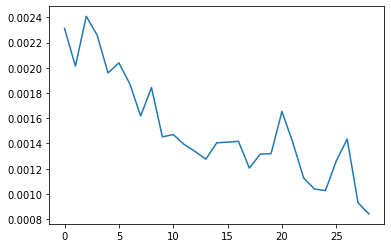

In [24]:
plt.plot(h.history['loss'][1:])

In [25]:
#Making the predictions
df_test=pd.read_csv('../hp/Downloads/stock_price_predict/Google_Stock_Price_Test.csv',index_col='Date',parse_dates=True)

In [26]:
#Getting the real stock price of 2017
real_stock_price = df_test.iloc[:,1:2].values

In [27]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [29]:
df_test['Volume'] = df_test['Volume'].str.replace(',','').astype(float)

In [30]:
test_set=df_test['Open']
test_set=pd.DataFrame(test_set)

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [32]:
dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(df_test)-60:].values
inputs =inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)

In [33]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


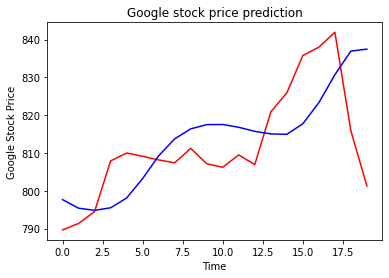

In [34]:
plt.plot(real_stock_price,color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()